In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
digits = load_digits()
X = digits.data
y = digits.target

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(x_train)
x_train_norm=norm(x_train)
x_test_norm=norm(x_test)
print(x_train_norm[:5,])

tf.Tensor(
[[ 0.         -0.34169757 -0.46336046  0.5083647  -2.5459058  -1.0372258
  -0.40623423 -0.13101876 -0.06103493 -0.617254    0.30881423  0.00348329
  -2.1815255  -1.3560853  -0.52465504 -0.13336004 -0.04991522  0.12851912
   1.0885799  -0.19343735 -1.1601098  -1.2730784  -0.552537   -0.11409248
  -0.03733267  0.8636515   1.1374469  -1.1619598  -1.6083591  -1.2829618
  -0.6255487  -0.04573894  0.          1.0915152   1.3431859  -1.1267812
  -0.9010656  -1.131853   -0.8134724   0.         -0.06519029  0.82828945
   1.3998146  -0.8254086   0.69177175  1.1786553  -0.3378425  -0.09403434
  -0.0396301   0.15955797  1.1424477   0.6450796  -1.4228216   0.6891791
   1.4799013  -0.21608405 -0.02638899 -0.30677646 -0.49962246 -0.24627192
   0.8480438   1.052703    0.45952252 -0.19710004]
 [ 0.         -0.34169757  0.7847165  -0.6586001  -1.8446023  -1.0372258
  -0.40623423 -0.13101876 -0.06103493 -0.617254    0.8589375   0.7543047
   0.76199764  0.60700536 -0.52465504 -0.13336004 -0.049

In [59]:
def train_model(x_train,y_train,epochs,learning_rate):
    model = Sequential([
        Dense(units=128,activation='relu',input_shape=(64,),kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=10,activation='linear')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

    early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

    history = model.fit(x_train,y_train,epochs=epochs,validation_split=0.2,callbacks=[early_stop])

    loss = min(history.history['val_loss'])

    return model,history,loss

In [65]:
def plot_loss(history):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
def plot_accuracy(history):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.tight_layout()
    plt.legend()
    plt.show()

In [61]:
epochs = [10,50,100]
lr = [0.001,0.01,0.05]
least_val_loss = float('inf')
best_model =  None
History=None
for eps in epochs:
  for l_rate in lr:

    model,history,loss = train_model(x_train_norm,y_train,eps,l_rate)

    if loss < least_val_loss:
      least_val_loss = loss
      best_model = model
      History=history



Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3266 - loss: 2.2489 - val_accuracy: 0.7222 - val_loss: 1.3011
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8311 - loss: 0.9852 - val_accuracy: 0.8924 - val_loss: 0.6420
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9525 - loss: 0.4727 - val_accuracy: 0.9306 - val_loss: 0.4939
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9866 - loss: 0.3304 - val_accuracy: 0.9410 - val_loss: 0.4197
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9942 - loss: 0.2915 - val_accuracy: 0.9514 - val_loss: 0.4025
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9938 - loss: 0.2642 - val_accuracy: 0.9514 - val_loss: 0.3799
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9950 - loss: 0.2500 - val_accuracy: 0.9583 - val_loss: 0.3676
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9957 - loss: 0.2406 - val_accuracy: 0.9653 - val_loss

In [62]:
model.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,960 (222.50 KB)

 Trainable params: 18,986 (74.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,974 (148.34 KB)

In [63]:
y_pred_train=model.predict(x_train_norm)
y_pred_test=model.predict(x_test_norm)
print(accuracy_score(y_train,y_pred_train.argmax(axis=1)))
print(accuracy_score(y_test,y_pred_test.argmax(axis=1)))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
0.97633959638135
0.9722222222222222


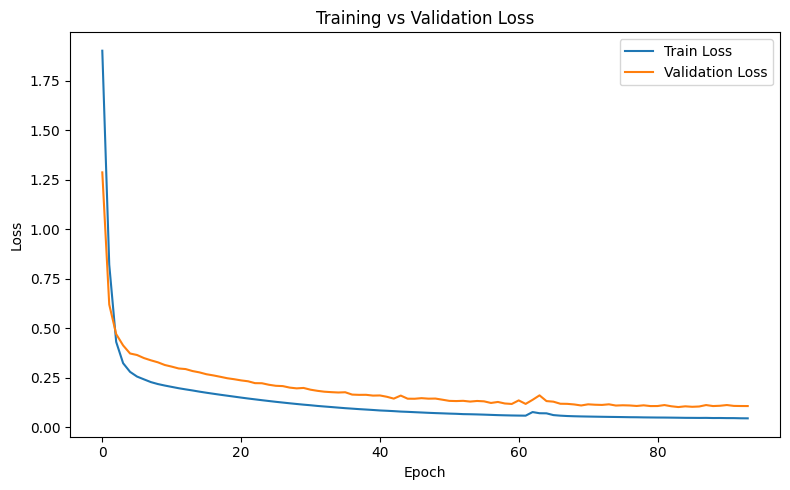

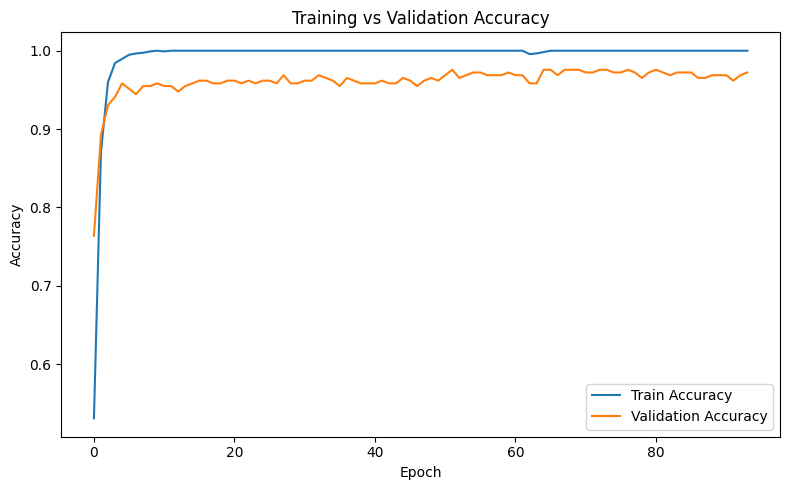

In [66]:
plot_loss(History)
plot_accuracy(History)

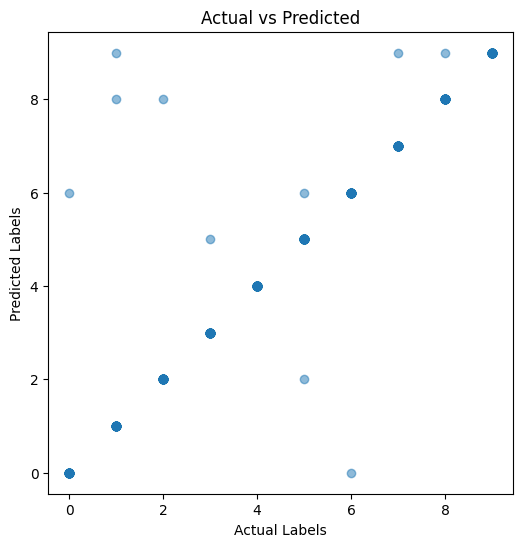

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test.argmax(axis=1), alpha=0.5)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Actual vs Predicted")
plt.show()